In [1]:
using DifferentialEquations
using Plots
using Integrals

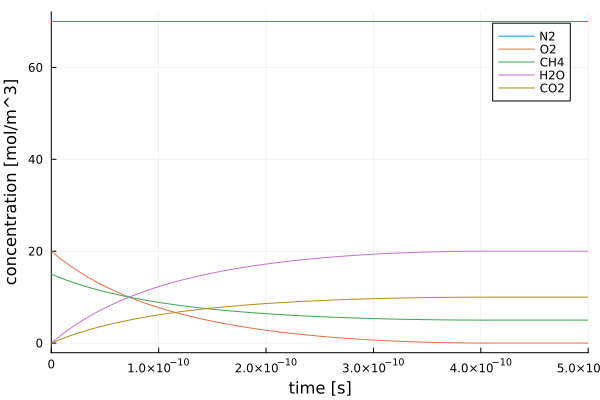

In [34]:
#temperature (assumed constant)
T = 1200 #K

#initial species concentrations 1. N2, 2. O2, 3. CH4, 4. H2O, 5. CO2
X0 = [70, 20, 15, 0, 0] #mol/m^3

# 2*O2 + CH4 -> 2*H2O + CO2
S = [0, -2, -1, 2, 1]

function Arrhenius(T, X)
    # Constants
    n_CH4 = 1.0
    n_O2 = 0.5
    A = 1.1e10
    Ea = 2e4 # J/mol
    R = 8.314 # J/mol/K
    
    # Ensure positive concentrations for exponentiation
    CH4_concentration = max(X[3], 0)
    O2_concentration = max(X[2], 0)
    
    k = A * exp(-Ea / (R * T)) # rate constant
    r = k * CH4_concentration^n_CH4 * O2_concentration^n_O2 # reaction rate
    return r
end

function f!(dX, X, p, t)
    r = Arrhenius(T, X)
    dX .= r .* S
end

# define time span 
tend = 5e-10
tspan = (0, tend)

# define problem 
problem = ODEProblem(f!, X0, tspan)

# solve problem 
sol = solve(problem, alg_hints=[:stiff])

# plot solution obtained 
plot1 = plot(sol, xaxis="time [s]", yaxis="concentration [mol/m^3]", label=["N2" "O2" "CH4" "H2O" "CO2"])

plot(plot1, legend=true)
